# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kotel'nikovo
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | bereznik
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | vernon
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bilibino
City not found. Skipping...
Processing Record 9 of Set 1 | mahina
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | saint-francois
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | koungheul
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | balkh
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | hotan
Processing Record 22 of Set 1 | blackmans bay
Processing Rec

Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | escanaba
Processing Record 40 of Set 4 | chhatak
Processing Record 41 of Set 4 | punta arenas
Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | rongelap
Processing Record 44 of Set 4 | buurhakaba
Processing Record 45 of Set 4 | udachny
Processing Record 46 of Set 4 | simanggang
Processing Record 47 of Set 4 | san lorenzo
Processing Record 48 of Set 4 | brookings
Processing Record 49 of Set 4 | angol
Processing Record 0 of Set 5 | prince rupert
Processing Record 1 of Set 5 | musan-up
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | korotchaevo
City not found. Skipping...
Processing Record 4 of Set 5 | masterton
Processing Record 5 of Set 5 | berezovo
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | ogulin
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | petrolina
Processing Record 11 of Se

Processing Record 28 of Set 8 | tartagal
Processing Record 29 of Set 8 | kangding
Processing Record 30 of Set 8 | timbiqui
Processing Record 31 of Set 8 | kuanda
Processing Record 32 of Set 8 | selfoss
Processing Record 33 of Set 8 | hirara
Processing Record 34 of Set 8 | queenstown
Processing Record 35 of Set 8 | lucas
Processing Record 36 of Set 8 | cayambe
Processing Record 37 of Set 8 | siuna
Processing Record 38 of Set 8 | bonga
Processing Record 39 of Set 8 | limon
Processing Record 40 of Set 8 | laguna
Processing Record 41 of Set 8 | saldanha
Processing Record 42 of Set 8 | kourou
Processing Record 43 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 44 of Set 8 | delijan
Processing Record 45 of Set 8 | nar'yan-mar
Processing Record 46 of Set 8 | ranchettes
Processing Record 47 of Set 8 | marijampole
Processing Record 48 of Set 8 | konya
Processing Record 49 of Set 8 | tame
Processing Record 0 of Set 9 | tual
Processing Record 1 of Set 9 | rabigh
Processin

Processing Record 16 of Set 12 | antsiranana
Processing Record 17 of Set 12 | la ronge
Processing Record 18 of Set 12 | caleta de carquin
Processing Record 19 of Set 12 | barabai
Processing Record 20 of Set 12 | al kharijah
Processing Record 21 of Set 12 | columbus
Processing Record 22 of Set 12 | bryan
Processing Record 23 of Set 12 | wuchuan
Processing Record 24 of Set 12 | hobyo
Processing Record 25 of Set 12 | ancud
Processing Record 26 of Set 12 | puerto colombia
Processing Record 27 of Set 12 | cabedelo
Processing Record 28 of Set 12 | yekaterinoslavka
Processing Record 29 of Set 12 | devarkonda
Processing Record 30 of Set 12 | madalena
Processing Record 31 of Set 12 | kalymnos
Processing Record 32 of Set 12 | encruzilhada do sul
Processing Record 33 of Set 12 | paita
Processing Record 34 of Set 12 | saudarkrokur
Processing Record 35 of Set 12 | nabire
Processing Record 36 of Set 12 | pimentel
Processing Record 37 of Set 12 | shantobe
Processing Record 38 of Set 12 | at taj
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kotel'nikovo,47.6317,43.1461,10.65,77,100,10.24,RU,1701454804
1,ilulissat,69.2167,-51.1000,2.01,48,20,7.20,GL,1701454804
2,bereznik,62.8551,42.7072,-9.57,98,100,0.95,RU,1701454805
3,anadyr,64.7500,177.4833,-10.72,100,75,4.00,RU,1701454805
4,vernon,50.2581,-119.2691,0.16,76,100,3.58,CA,1701454806


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kotel'nikovo,47.6317,43.1461,10.65,77,100,10.24,RU,1701454804
1,ilulissat,69.2167,-51.1000,2.01,48,20,7.20,GL,1701454804
2,bereznik,62.8551,42.7072,-9.57,98,100,0.95,RU,1701454805
3,anadyr,64.7500,177.4833,-10.72,100,75,4.00,RU,1701454805
4,vernon,50.2581,-119.2691,0.16,76,100,3.58,CA,1701454806


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

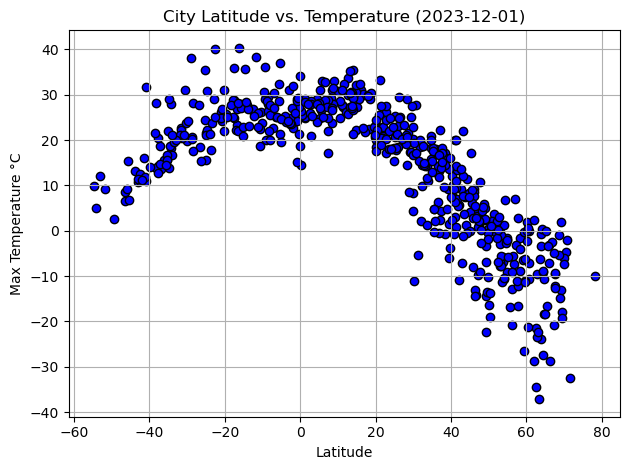

In [22]:
formatted_date = datetime.datetime.utcfromtimestamp(city_data_df['Date'].min()).strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title(f"City Latitude vs. Temperature ({formatted_date})")  

# Corrected variable name here
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

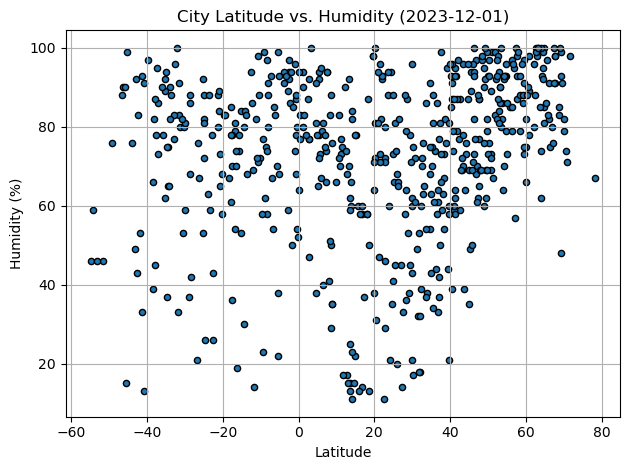

In [24]:
formatted_date = datetime.datetime.utcfromtimestamp(city_data_df['Date'].min()).strftime('%Y-%m-%d')

# Build the scatter plots for latitude vs. humidity
formatted_date = datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')

city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({formatted_date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

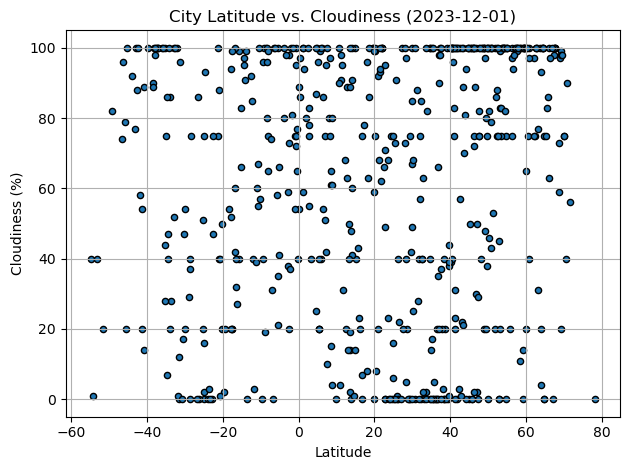

In [23]:
formatted_date = datetime.datetime.utcfromtimestamp(city_data_df['Date'].min()).strftime('%Y-%m-%d')

# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({formatted_date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

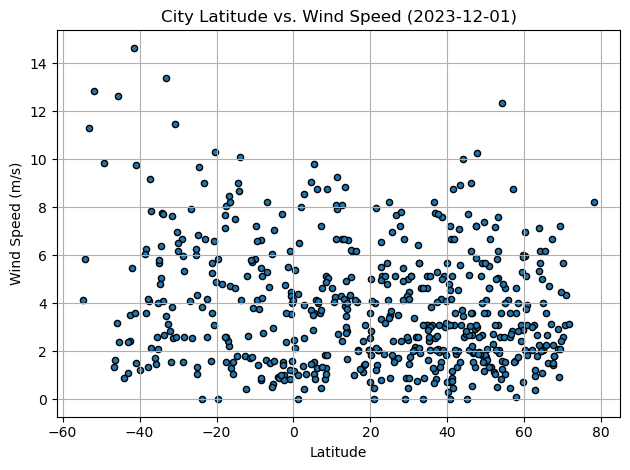

In [25]:
formatted_date = datetime.datetime.utcfromtimestamp(city_data_df['Date'].min()).strftime('%Y-%m-%d')

# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({formatted_date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kotel'nikovo,47.6317,43.1461,10.65,77,100,10.24,RU,1701454804
1,ilulissat,69.2167,-51.1000,2.01,48,20,7.20,GL,1701454804
2,bereznik,62.8551,42.7072,-9.57,98,100,0.95,RU,1701454805
3,anadyr,64.7500,177.4833,-10.72,100,75,4.00,RU,1701454805
4,vernon,50.2581,-119.2691,0.16,76,100,3.58,CA,1701454806


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,21.60,72,16,4.36,PN,1701454806
7,mahina,-17.5065,-149.4890,28.87,70,20,1.54,PF,1701454808
8,papatowai,-46.5619,169.4708,8.47,88,74,1.36,NZ,1701454808
9,coquimbo,-29.9533,-71.3436,19.85,59,20,6.17,CL,1701454795
10,hermanus,-34.4187,19.2345,18.34,75,40,6.40,ZA,1701454810


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.71x + 35.67
The r-value is: -0.8781623499080929


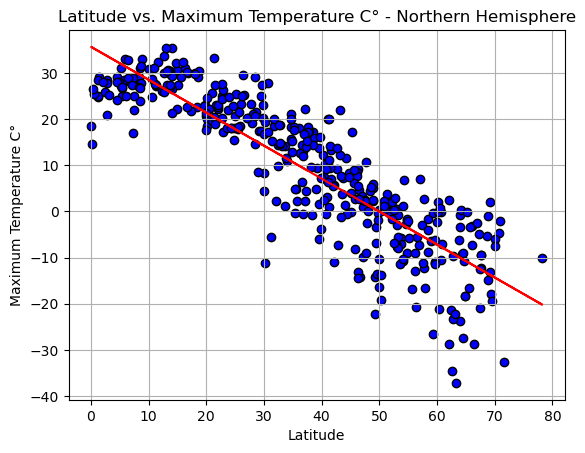

In [28]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.32x + 29.95
The r-value is: 0.6513812308921202


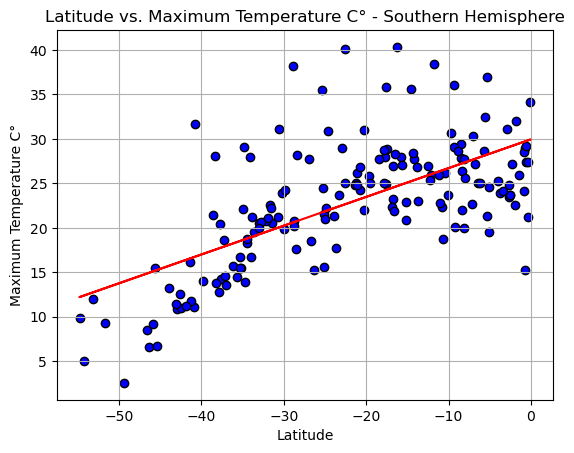

In [29]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.42x + 56.98
The r-value is: 0.37150449719477296


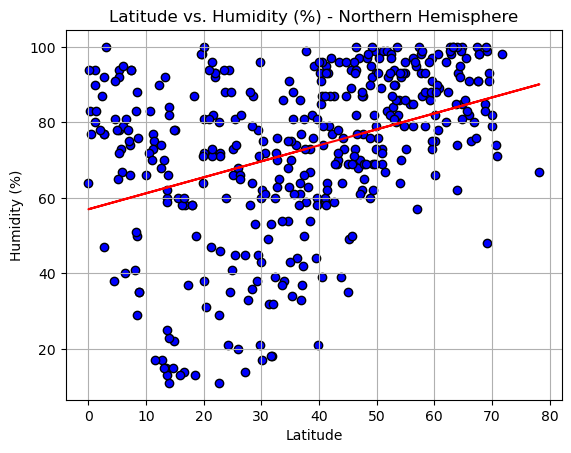

In [30]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.18x + 75.88
The r-value is: 0.12299868949013493


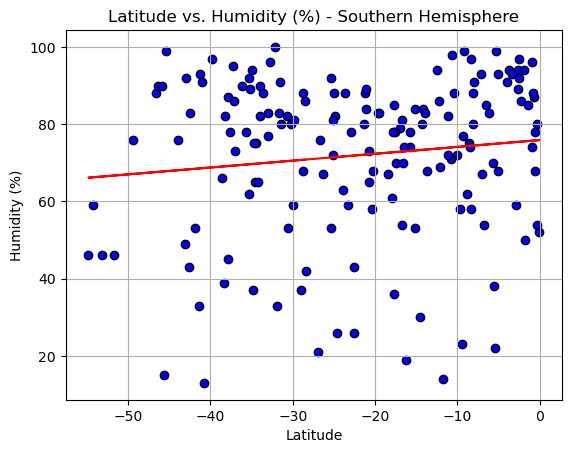

In [31]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.31x + 49.92
The r-value is: 0.15307340295203697


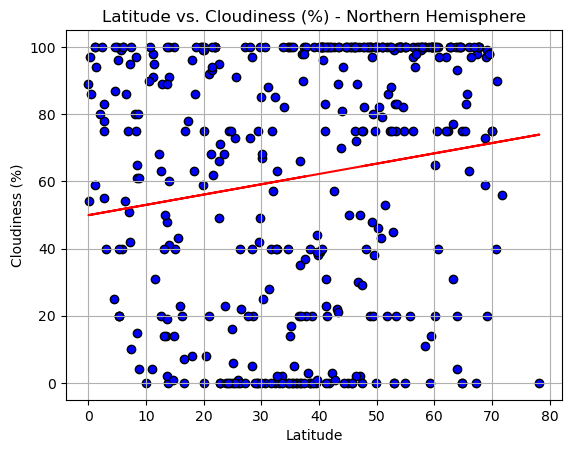

In [32]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.13x + 62.12
The r-value is: 0.052277376549898134


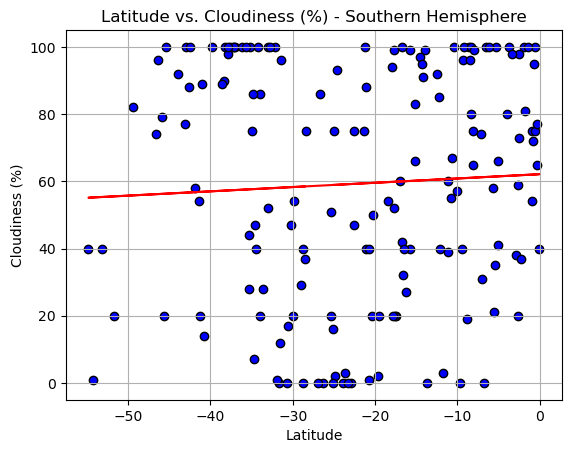

In [33]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.01x + 3.8
The r-value is: -0.05851081502379595


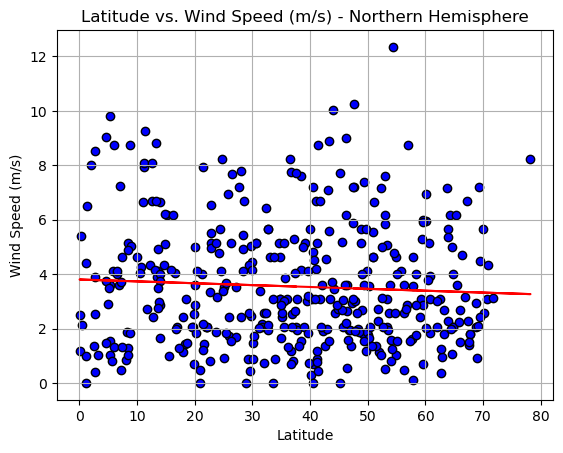

In [34]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 3.42
The r-value is: -0.22730351185489836


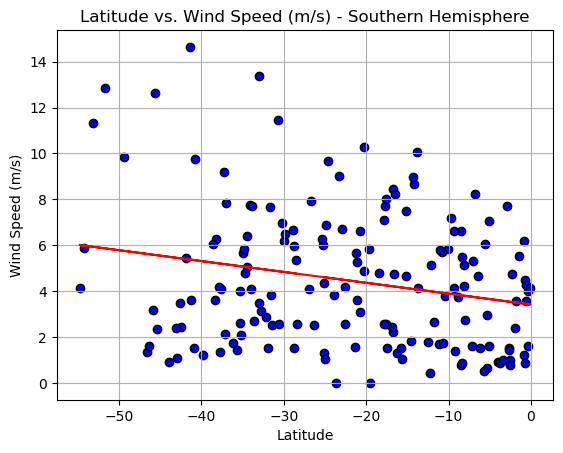

In [35]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:**

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.